In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

In [2]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 10}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (7, 3)

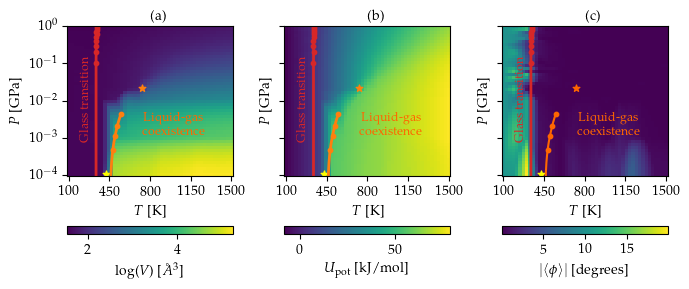

In [3]:
data = np.genfromtxt('averages_modified2.txt')
glass = np.genfromtxt('glasstransition.txt')
gas = np.genfromtxt('gastransition.txt')
gas[:, 1]=gas[:, 1]*0.000101325
glass[:, 0]=glass[:, 0]*0.000101325

temperature = data[:,1]
pressure = data[:,2]*0.000101325
avg_volume = data[:,3]
avg_pe = data[:,4]
avg_dihedral = data[:,5]

press_glass = glass[:,0]
temp_glass = glass[:,1]

temp_gas = gas[:,0]
press_gas = gas[:,1]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

# Volume colormap
X = np.linspace(min(temperature), max(temperature))
Y = np.logspace(min(np.log10(pressure)), max(np.log10(pressure)))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(temperature, pressure)), np.log10(avg_volume))
Z = interp(X, Y)
colormesh1 = ax1.pcolormesh(X, Y, Z, shading='auto')

# Glass transition
ax1.plot(temp_glass,press_glass, linestyle='-', color='tab:red',linewidth=2)
ax1.scatter(temp_glass,press_glass, s=10, color='tab:red')

# Gas-Liquid transition
ax1.scatter(temp_gas,press_gas, s=10, color='tab:orange')
# Here I use the interpolation
x = gas[:, 0]
y = gas[:, 1]
coefficients = np.polyfit(x, y, len(x) - 1)
polynomial = np.poly1d(coefficients)
x_new = np.linspace(x[0], x[-1], 500)
y_new = polynomial(x_new)
ax1.plot(x_new, y_new, linestyle='-', color='tab:orange',linewidth=2)

# Experimental
ax1.scatter([423.3],[1*0.000101325],marker="*",s=25, color='yellow')
ax1.scatter([728.],[220*0.000101325],marker="*",s=25, color='tab:orange')

# Plot layout and options
ax1.set_ylim([0.9e-4,1])
ax1.set_yticks([1.0e-4,1.0e-3,1.0e-2,1.0e-1,1])
ax1.set_xlabel('$T$ [K]')
ax1.set_ylabel('$P$ [GPa]')
#plt.colorbar(colormesh, label="log($V$) [$\AA^3$]")
ax1.set_yscale('log')
ax1.text(250,100*0.000101325,"Glass transition",rotation=90, color='tab:red',va="center",ha="center",fontsize=9)
ax1.text(1000,20*0.000101325,"Liquid-gas \n coexistence", color='#ff6600',va="center",ha="center",fontsize=9,fontweight='bold')

####################################

# Volume colormap
X = np.linspace(min(temperature), max(temperature))
Y = np.logspace(min(np.log10(pressure)), max(np.log10(pressure)))
X, Y = np.meshgrid(X, Y) 
interp = LinearNDInterpolator(list(zip(temperature, pressure)), avg_pe*4.184)
Z = interp(X, Y)
colormesh2 = ax2.pcolormesh(X, Y, Z, shading='auto')

# Glass transition
ax2.plot(temp_glass,press_glass, linestyle='-', color='tab:red', linewidth=2)
ax2.scatter(temp_glass,press_glass, s=10, color='tab:red')

# Gas-Liquid transition
ax2.scatter(temp_gas,press_gas, s=10, color='tab:orange')
# Here I use the interpolation
x = gas[:, 0]
y = gas[:, 1]
coefficients = np.polyfit(x, y, len(x) - 1)
polynomial = np.poly1d(coefficients)
x_new = np.linspace(x[0], x[-1], 500)
y_new = polynomial(x_new)
ax2.plot(x_new, y_new, linestyle='-', color='tab:orange', linewidth=2)

# Experimental
ax2.scatter([423.3],[1*0.000101325],marker="*",s=25, color='yellow')
ax2.scatter([728.],[220*0.000101325],marker="*",s=25, color='tab:orange')

# Plot layout and options
ax2.set_ylim([0.9e-4,1])
ax2.set_xlabel('$T$ [K]')
ax2.set_ylabel('$P$ [GPa]')
ax2.set_yscale('log')
ax2.text(250,100*0.000101325,"Glass transition",rotation=90, color='tab:red',va="center",ha="center",fontsize=9, fontweight='bold')
ax2.text(1000,20*0.000101325,"Liquid-gas \n coexistence", color='#ff6600',va="center",ha="center",fontsize=9,fontweight='bold')

#################################

# Volume colormap
X = np.linspace(min(temperature), max(temperature))
Y = np.logspace(min(np.log10(pressure)), max(np.log10(pressure)))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(temperature, pressure)), np.abs(avg_dihedral))
Z = interp(X, Y)
colormesh3 = ax3.pcolormesh(X, Y, Z, shading='auto')

# Glass transition
ax3.plot(temp_glass,press_glass, linestyle='-', color='tab:red', linewidth=2)
ax3.scatter(temp_glass,press_glass, s=10, color='tab:red')

# Gas-Liquid transition
plt.scatter(temp_gas,press_gas, s=10, color='#ff6600')
# Here I use the interpolation
x = gas[:, 0]
y = gas[:, 1]
coefficients = np.polyfit(x, y, len(x) - 1)
polynomial = np.poly1d(coefficients)
x_new = np.linspace(x[0], x[-1], 500)
y_new = polynomial(x_new)
ax3.plot(x_new, y_new, linestyle='-', color='#ff6600')

# Experimental
ax3.scatter([423.3],[1*0.000101325],marker="*",s=25, color='yellow')
ax3.scatter([728.],[220*0.000101325],marker="*",s=25, color='#ff6600')

# Plot layout and options
ax3.set_ylim([0.9e-4,1])
ax3.set_xlabel('$T$ [K]')
ax3.set_ylabel('$P$ [GPa]')
#plt.colorbar(colormesh, label=r"$|\langle\phi\rangle|$ [degrees]")
ax3.set_yscale('log')
ax3.set_yticks([1.0e-4,1.0e-3,1.0e-2,1.0e-1,1])
ax3.set_xticks([100,450,800,1150,1500])
ax3.text(250,100*0.000101325,"Glass transition",rotation=90, color='tab:red',va="center",ha="center", fontsize=9, fontweight='bold')
ax3.text(1000,20*0.000101325,"Liquid-gas \n coexistence", color='#ff6600',va="center",ha="center", fontsize=9,fontweight='bold')

from mpl_toolkits.axes_grid1 import make_axes_locatable
# add color bar below chart
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size='5%', pad=0.5, pack_start = True)
f.add_axes(cax)
f.colorbar(colormesh1, cax = cax, orientation = 'horizontal', label="log($V$) [$\AA^3$]")

from mpl_toolkits.axes_grid1 import make_axes_locatable
# add color bar below chart
divider = make_axes_locatable(ax2)
cax = divider.new_vertical(size='5%', pad=0.5, pack_start = True)
f.add_axes(cax)
f.colorbar(colormesh2, cax = cax, orientation = 'horizontal', label=r"$U_{\mathrm{pot}}$ [kJ/mol]")

from mpl_toolkits.axes_grid1 import make_axes_locatable
# add color bar below chart
divider = make_axes_locatable(ax3)
cax = divider.new_vertical(size='5%', pad=0.5, pack_start = True)
f.add_axes(cax)
f.colorbar(colormesh3, cax = cax, orientation = 'horizontal', label=r"$|\langle\phi\rangle|$ [degrees]")

ax1.text(800,1.5,"(a)")
ax2.text(800,1.5,"(b)")
ax3.text(800,1.5,"(c)")
plt.tight_layout()

plt.savefig('figs/phase.pdf',bbox_inches='tight')

plt.show()
